In [138]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np

In [2]:
filename = "/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/tp-4/data.csv"

# Parsing

Aclaraciones previas:

Debido a la forma en que tomamos los datos del achivo de colaboraciones entre autores, nos dimos cuanta que algunos nombres no parecen ser nombres válidos de autores, como por ejemplo: ")". Dado que la cantidad de esos errores sobre la cantidad de datos que teníamos era despreciable, decidimos no remover esos elementos.
Por otro lado, aplicamos un filtro para caracteres que estaban siendo utilizados para separar los distintos autores, dado que no pertenecen a los nombres de los mismos, como por ejemplo: "--".

In [3]:
def filter_word(word):
    word = word.replace(" ", "")
    word = word.replace("--", "-")
    word = word.upper()
    return word.replace("\\.", "")

In [4]:
co_autores = []
autores = []
lobos_solitarios = []

with open(filename,'r') as f:
    for line in f:
        line = line.split(',')
        line = line[3].split('&')
        cleaned_line = [filter_word(w) for w in line]
        if len(cleaned_line) > 1:
            co_autores.append(cleaned_line)
            for i in cleaned_line:
                autores.append(i)
        else:
            lobos_solitarios.append(cleaned_line)

autores= list(set(autores))

In [5]:
autores_size = len(autores)
adys = np.zeros((autores_size,autores_size))
co_autores_data = pd.DataFrame(data=adys, columns=autores, index=autores)
co_autores_data.max()

lista_de_tuplas=[]
for TUPLA in co_autores:
    pares=list(itertools.combinations(TUPLA, 2))
        
    for i in pares:
        lista_de_tuplas.append(i)
        co_autores_data[i[0]][i[1]]=co_autores_data[i[0]][i[1]]+1
        co_autores_data[i[1]][i[0]]=co_autores_data[i[1]][i[0]]+1
        
lista_de_tuplas = list(set(lista_de_tuplas))

## Ejercicio 1

In [88]:
print "Cantidad de nodos: "
print len(autores)

print "Cantidad de aristas: "
print len(lista_de_tuplas)

Cantidad de nodos: 
3684
Cantidad de aristas: 
8113


Debido a la gran cantidad de nodos y aristas del grafo, debimos graficar un subgrafo del mismo. Para ello implementamos una función recursiva que parte de un nodo inicial e incorpora tantos niveles como indica el parámetro.

In [86]:
def obtener_subgrafo(el_grafo, inicial, iteraciones):
    grafo=el_grafo[:]
    subgrafo=[]
    if(iteraciones>0):
        adys=[]
        for arista in grafo:
            if(arista[0]==inicial):
                subgrafo.append(arista)
                grafo.remove(arista)
                adys.append(arista[1])
            else:
                if(arista[1]==inicial):
                    subgrafo.append(arista)
                    grafo.remove(arista)
                    adys.append(arista[0])
        for nodo in adys:
            res = obtener_subgrafo(grafo, nodo, iteraciones-1)
            subgrafo = subgrafo + res

    return list(set(subgrafo))

In [7]:
sub_grafo = obtener_subgrafo(lista_de_tuplas , "AOKI", 5)

In [96]:
print "Cantidad de aristas del subgrafo: "
print len(sub_grafo)

Cantidad de aristas del subgrafo: 
3478


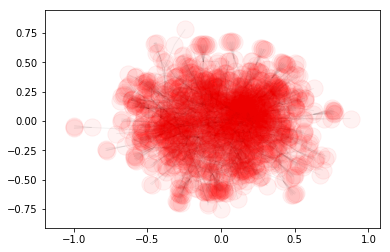

In [182]:
import networkx as nx
G_ej1 = nx.Graph()
G_ej1.add_edges_from(sub_grafo)
nx.draw_networkx(G_ej1, alpha=0.05, with_labels=False)

## Ejercicio 2

En primer lugar graficamos el grado en función de nodos ordenados según su grado

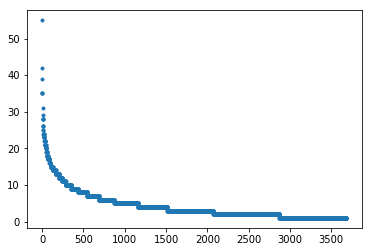

In [263]:
G_ej2 = nx.Graph()
G_ej2.add_edges_from(lista_de_tuplas)

degrees = np.array(nx.degree(G_ej2))[:,1]
degrees
rango = range(0,len(degrees))
degrees = [int(d) for d in degrees]
degrees = sorted(degrees, reverse=True)
plt.plot(rango, degrees,'.')

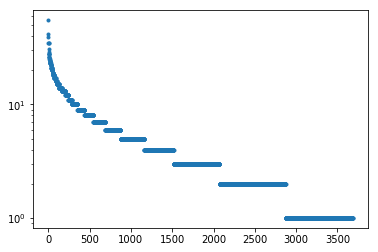

In [264]:
plt.clf()
plt.plot(rango, degrees, '.')
plt.yscale('log')

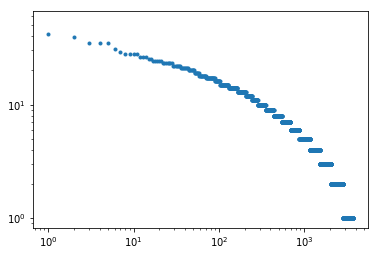

In [14]:
plt.clf()
plt.plot(rango, degrees,'.')
plt.yscale('log')
plt.xscale('log')

## Version histogramas

Lo anterior no es del todo correcto. Un gráfico más acorde (que resume mejor la información) es cantidad de nodos en función del grado, obtenida a partir de un histograma

In [132]:
values, bins = np.histogram(co_autores_data.sum(axis=0), bins=50)

In [133]:
nuevos_bins = []
for i in range(0, len(bins)-1):
    bins_i = (bins[i] + bins[i + 1])/float(2)
    nuevos_bins.append(bins_i)

Al graficar ambos ejes con escala lineal, observamos una curva: Puede indicar tanto una Ley de Potencias como una Exponencial

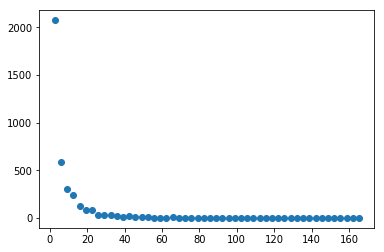

In [134]:
plt.plot(nuevos_bins, values, 'o')
plt.show()

Al graficar el eje Y con escala logarítmica, seguimos observando una curva. Esto indica que la distribución de grado no es exponencial

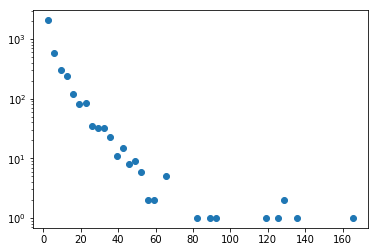

In [135]:
plt.clf()
plt.plot(nuevos_bins, values, 'o')
plt.yscale("log")
plt.show()

Pero, al graficar ambos ejes con escala logarítmica observamos una recta, lo cual es indicio de una distribución de grado que sigue una Ley de Potencias

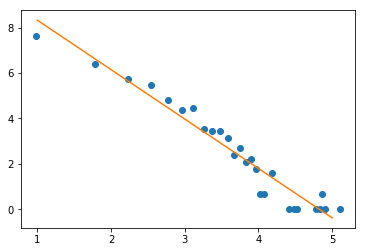

In [176]:
res = []
for i in range(0,len(values)):
    if(values[i] != 0):
        res.append(((np.log(nuevos_bins[i])), (np.log(values[i]))))
log_nuevos_bins = [t[0] for t in res]
log_values = [t[1] for t in res]
plt.plot(log_nuevos_bins, log_values, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(log_nuevos_bins,log_values)
ys = [slope * i + intercept  for i in range(1,6)]   
plt.plot(range(1,6), ys)
plt.show()

# Ej3: componentes_conexas

In [183]:
G_ej3 = nx.Graph()
G_ej3.add_edges_from(lista_de_tuplas)

In [186]:
componentes_conexas = list(nx.connected_components(G_ej3))

In [187]:
print "El número de componentes conexas es: "
print len(componentes_conexas)

El número de componentes conexas es: 
224


In [189]:
cardinal = [ len(l) for l in componentes_conexas]
maximo = max(cardinal)

print "El tamaño de a componente gigante es: "
print maximo

El tamaño de a componente gigante es: 
3046


# Ej4: Tamaño de vecindades

In [27]:
componente_gigante = list(componentes_conexas[cardinal.index(maximo)])

In [192]:
def cantidad_de_vecinos():
    import random as rd
    iteraciones = 6 # es el grado de separacion
    cant_personas = 10
    autores_rd = [componente_gigante[rd.randint(0,len(componente_gigante))] for i in range(0, cant_personas)]

    autores_x_profundidad = np.zeros((cant_personas,iteraciones))

    for i in range(0,len(autores_rd)):
        for j in range(1,iteraciones):
            subgrafo = obtener_subgrafo(lista_de_tuplas, autores_rd[i], j)
            G_i = nx.Graph()
            G_i.add_edges_from(subgrafo)
            cantidad_de_vec = len(G_i.nodes())
            autores_x_profundidad[i][j] = int(cantidad_de_vec)

    print 'Totales'
    totales = autores_x_profundidad[:,1:]
    
    for i in range(0,len(autores_rd)):
        for j in range(1,iteraciones):
            for k in range(0,j):
                autores_x_profundidad[i][j] = autores_x_profundidad[i][j] - autores_x_profundidad[i][k]
    print 'Por nivel'
    por_nivel = autores_x_profundidad[:,1:]
    print "Los autores fueron: ", autores_rd
    return autores_rd, totales, por_nivel

In [193]:
autores_rd, totales, por_nivel = cantidad_de_vecinos()

Totales
Por nivel
Los autores fueron:  ['IELLICI', 'LAWRENCE', 'EWEN', 'WEIGERT', 'EZAWA', 'LAFRANCE', 'LOVE', 'SLEATOR', 'DALVIT', 'BERGERON']


Graficamos cómo aumenta el tamaño de las vecindades en función de los niveles. Se observa un aumento considerable de un nivel respecto del siguiente. La forma es una parábola creciente. Podría seguir una ley de potencias o exponencial. Por la "Prueba 1", creemos que el promedio tiene una distribucion exponenecial.

###### Número de autores alcanzados en función de la distancia al nodo semilla

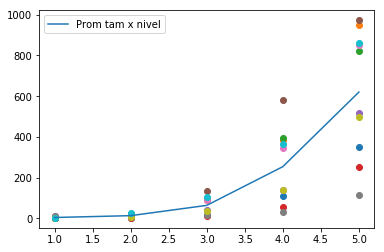

In [212]:
for tamanio_x_niveles_autor in totales:
    plt.plot(range(1,6),tamanio_x_niveles_autor,'o')
promedio_tamanio_x_niveles_autor = np.mean(totales, axis=0)
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor, label="Prom tam x nivel")
plt.legend()
plt.show()

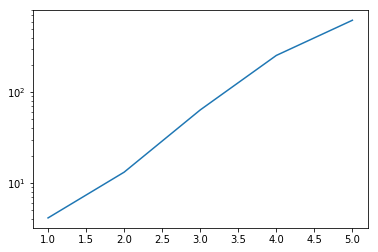

In [213]:
#Prueba 1
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor, label="Prom tam x nivel")
plt.yscale("log")

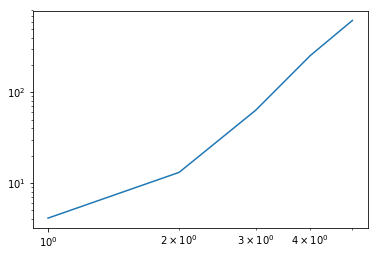

In [214]:
#Prueba 2

plt.plot(range(1,6),promedio_tamanio_x_niveles_autor, label="Prom tam x nivel")
plt.yscale("log")
plt.xscale("log")

##### Número de nuevos autores que se agregan en cada paso

Al igual que el caso anterior, observamos que al considerar únicamente las diferencias entre el nivel actual y el anterior la distribución también es exponencial.

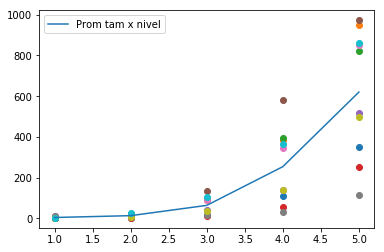

In [216]:
for tamanio_x_niveles_autor in por_nivel:
    plt.plot(range(1,6),tamanio_x_niveles_autor,'o')
promedio_tamanio_x_niveles_autor_cp = np.mean(por_nivel, axis=0)
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor_cp, label="Prom tam x nivel")
plt.legend()
plt.show()

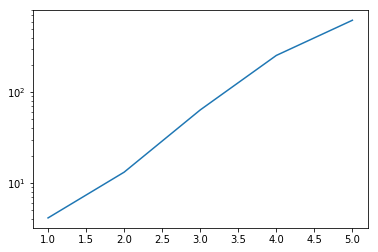

In [217]:
#Prueba 1
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor_cp, label="Prom tam x nivel")
plt.yscale("log")

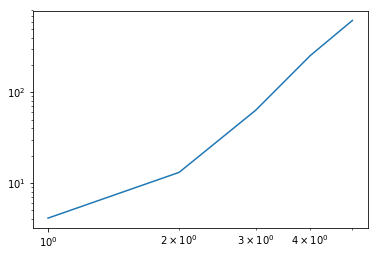

In [218]:
#Prueba 1
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor_cp, label="Prom tam x nivel")
plt.xscale("log")
plt.yscale("log")

Luego de realizar los 2 graficos, es decir, la cantidad de nodos totales que tiene el grafo en cada nivel y las diferencias entre un nivel y el anterior, vemos que ambas distribuciones son exponenciales si calculamos los valores para los niveles 1 a 6. 

Esperamos que a partir de los siguientes niveles la curva adquiera otra distribución dado que con 6 grados de separación se alcanza un tamaño que representa un gran porcentaje de los nodos totales.

## Ejercicio 5
#### Clustering Coeficient

In [222]:
G_ej5 = nx.Graph()
G_ej5.add_edges_from(lista_de_tuplas)
componentes_conexas = list(nx.connected_components(G_ej5))
contenedor_ggigante = componentes_conexas[0]

In [230]:
A = nx.clustering(G_ej5,contenedor_ggigante)
B = nx.average_clustering(G_ej5, contenedor_ggigante)

In [229]:
print "Coeficiente de Clustering promedio para la componente gigante: "
print B

Coeficiente de Clustering promedio para la componente gigante: 
0.483770334643


#### Shortest Path Length

In [232]:
subgraph = G_ej5.subgraph(contenedor_ggigante)
SPL = nx.average_shortest_path_length(subgraph)

In [233]:
print "Longitud del camíno mínimo promedio de la componente gigante: "
print SPL

Longitud del camíno mínimo promedio de la componente gigante: 
6.08549326312


El spl es aproximadamente 6, lo que la separacion promedio entre 2 autores en el grafo de colaboraciones es 6, por lo tanto la componente gigante tiene estructura de mundo pequeño.

## Generación de grafo aleatorio con misma distribución

Generamos 2 grafos aleatorios de distinto tipo. 
El primero repeta exactamente la misma distribución de los grados, mientras que el segundo utiliza únicamente el grado promedio.

In [34]:
d = nx.degree(subgraph)
d = np.array(d)
d = d[:,1].astype(np.float)
degree_random = np.mean(d)
random_graph = nx.random_degree_sequence_graph(list(d.astype(np.int)))
random_graph_2 = nx.random_regular_graph(int(degree_random), len(subgraph.nodes()), seed=None)

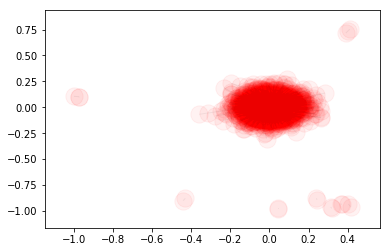

In [35]:
nx.draw_networkx(random_graph, alpha=0.05, with_labels=False)

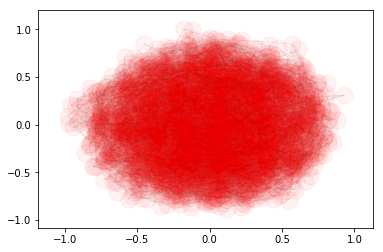

In [234]:
nx.draw_networkx(random_graph_2, alpha=0.05, with_labels=False)

In [237]:
componentes_conexas_random_graph = list(nx.connected_components(random_graph))
contenedor_ggigante_random_graph = componentes_conexas_random_graph[0]
print "Coeficiente de Clustering para el primer grafo aleatorio: "
print nx.average_clustering(random_graph, contenedor_ggigante_random_graph)

componentes_conexas_random_graph_2 = list(nx.connected_components(random_graph_2))
contenedor_ggigante_random_graph_2 = componentes_conexas_random_graph_2[0]
print "Coeficiente de Clustering para el segundo grafo aleatorio: "
print nx.average_clustering(random_graph_2, contenedor_ggigante_random_graph_2)

Coeficiente de Clustering para el primer grafo aleatorio: 
0.00514366828609
Coeficiente de Clustering para el segundo grafo aleatorio: 
0.000656598818122


Observamos que el Coeficiente de Clustering para el grafo creado siguiendo la misma distribución de grados es un orden de magnitud mayor. Esto puede explicarse a partir de su distribución small world, en donde hay más probabilidades de que los vecinos de cada nodo se conecten entre sí.

Al mismo tiempo, ambos coeficientes son considerablemente menores al coeficiente de clustering del grafo de coautorías (2 coeficientes de magnitud menores para el primer grafo y 3 para el segundo). Esto puede ser consecuencia de que las aristas sean generadas al azar.

In [254]:
c_gigante_random_graph = random_graph.subgraph(contenedor_ggigante_random_graph)
spl_random_graph = nx.average_shortest_path_length(c_gigante_random_graph)

c_gigante_random_graph_2 = random_graph_2.subgraph(contenedor_ggigante_random_graph_2)
spl_random_graph_2 = nx.average_shortest_path_length(c_gigante_random_graph_2)

In [256]:
print "Average Shortest Path para el primer grafo aleatorio: "
print spl_random_graph
print "Average Shortest Path para el segundo grafo aleatorio: "
print spl_random_graph_2

Average Shortest Path para el primer grafo aleatorio: 
4.72463373452
Average Shortest Path para el segundo grafo aleatorio: 
6.6488694964


La longitud promedio del camino mínimo favorece al primer grafo aleatorio. En principio puede resultar anti-intuitivo, ya que a mayor aleatoriedad la longitud promedio del camino mínimo debería ser menor. Sin embargo, el grado promedio elegido al crear el segundo grafo aleatorio fue 4, mientras que el grado promedio de la componente gigante original es 4.83. Esto puede ser la causa del fenómeno.

Al mismo tiempo, el Average Shortest Path Length para el primer grafo aleatorio es menor que para la componente gigante original. Al igual que sucede con el Coeficiente de Clustering, esto puede deberse a la aleatoriedad de las aristas.

### 6 . "Estrellas"

# Betweeness centrality

for cant_iteraciones:
    - componente_actual = encuentro componente conexa mas grande: componente gigante
    - guardo la proporcion de la componente_actual respecto al total
    - le calculo betweeness
    - tomo el maximo
    - lo saco

In [82]:
#valores iniciales
componente_actual = componente_gigante
n = len(componente_actual.nodes())

In [83]:
cant_iteraciones = 10

In [84]:
res_sobre_total = []
res_sobre_tam_anterior = []
for i in range(0, cant_iteraciones):
    tam_anterior = len(componente_actual.nodes())
    componente_actual = max(nx.connected_component_subgraphs(componente_actual), key=len)
    res_sobre_total.append(len(componente_actual.nodes())/float(n))
    res_sobre_tam_anterior.append(float(len(componente_actual.nodes()))/tam_anterior)
    dicc_betw_actual = nx.betweenness_centrality(componente_actual)
    node_with_max_betw = max(dicc_betw_actual.iteritems(), key=operator.itemgetter(1))[0]
    componente_actual.remove_node(node_with_max_betw)

In [89]:
res_sobre_total

[1.0,
 0.9983585029546946,
 0.9980302035456337,
 0.9963887065003283,
 0.9960604070912672,
 0.9957321076822062,
 0.9954038082731451,
 0.9947472094550229,
 0.9940906106369009,
 0.9904793171372291]

In [90]:
res_sobre_tam_anterior

[3046,
 1.0,
 3041.0,
 0.9996711608023676,
 3035.998355263158,
 0.9993417798597639,
 3034.9976966094787,
 0.9990122903181022,
 3032.995719237045,
 0.9983528762650871,
 3021.9775709835417]

In [58]:
#dicc_betw = nx.betweenness_centrality(contenedor_ggigante)

In [52]:
#values_betw_max= sorted(dicc_betw.values(), reverse = True)

In [483]:
values_betw_max

[0.07770887792507228,
 0.054832642660652166,
 0.05102930219072023,
 0.04044246065238775,
 0.0352888073787089,
 0.03345414517307276,
 0.0333801615860204,
 0.03148907081564816,
 0.030754302387256186,
 0.03040398228093612,
 0.030270907328132576,
 0.03005172215103958,
 0.02898971291138441,
 0.027819269432673037,
 0.02676892599209792,
 0.0262080543611584,
 0.025879941657334732,
 0.02528942398086746,
 0.02507810265995563,
 0.024065670863144623,
 0.021965070578770264,
 0.021707014850605773,
 0.02149711496917335,
 0.02145407507360965,
 0.021069575471563667,
 0.020406817631155674,
 0.01973001110015688,
 0.019482248957703546,
 0.01919674872680765,
 0.01884589200467481,
 0.01881209100144718,
 0.018784793028627893,
 0.01872957146382791,
 0.018712135295862325,
 0.01867965284022866,
 0.0184984247040971,
 0.0184055606092432,
 0.018306958734945717,
 0.01814253675823659,
 0.01795548922735312,
 0.017717542878838553,
 0.017337362709273784,
 0.01666804251162966,
 0.016521539213043734,
 0.01587742594055941

In [477]:
dicc_close = nx.closeness_centrality(subgraph)

In [485]:
values_close_max= sorted(dicc_close.values(), reverse = True)
values_close_max

[0.245129608758654,
 0.24299736653100312,
 0.23707567735907817,
 0.23540780827212987,
 0.23540780827212987,
 0.23513513513513515,
 0.23511697938383136,
 0.23317252469561223,
 0.23290500229463057,
 0.2328693790149893,
 0.23192931677964812,
 0.2319116527037319,
 0.23026315789473684,
 0.23024574669187145,
 0.22988071870753435,
 0.22932670582919115,
 0.2288441304674583,
 0.22858644245927484,
 0.22791916167664672,
 0.22688324267938306,
 0.2267818574514039,
 0.2266636891469406,
 0.22639405204460966,
 0.22632674297606659,
 0.2260746900289554,
 0.22525521526853085,
 0.22518858157077357,
 0.22449130050132704,
 0.22449130050132704,
 0.2242763497090668,
 0.22422680412371135,
 0.22421029379279878,
 0.2240618101545254,
 0.2239629302736099,
 0.2236668135742618,
 0.22356828193832598,
 0.22355186843844063,
 0.22253891690418767,
 0.22227899846704138,
 0.22213306098628538,
 0.22182559918408976,
 0.2216963960684383,
 0.2215351036740633,
 0.22142233856893542,
 0.22105263157894736,
 0.22100449992742052,
 0

## Closeness centrality

for cant_iteraciones:
    - componente_actual = encuentro componente conexa mas grande: componente gigante
    - guardo la proporcion de la componente_actual respecto al total
    - le calculo betweeness
    - tomo el maximo
    - lo saco

In [92]:
#valores iniciales
G_ej6 = nx.Graph()
G_ej6.add_edges_from(lista_de_tuplas)
componente_actual = componente_gigante_0
n = len(componente_actual.nodes())

In [101]:
cant_iteraciones_close = 300

In [102]:
res_sobre_total_closeness = []
res_sobre_tam_anterior_closeness = []
for i in range(0, cant_iteraciones_close):
    tam_anterior = len(componente_actual.nodes())
    componente_actual = max(nx.connected_component_subgraphs(componente_actual), key=len)
    res_sobre_total_closeness.append(len(componente_actual.nodes())/float(n))
    res_sobre_tam_anterior_closeness.append(float(len(componente_actual.nodes()))/tam_anterior)
    dicc_betw_actual = nx.nx.closeness_centrality(componente_actual)
    node_with_max_betw = max(dicc_betw_actual.iteritems(), key=operator.itemgetter(1))[0]
    componente_actual.remove_node(node_with_max_betw)

KeyboardInterrupt: 

In [100]:
1500/float(60)

25.0